In [12]:
import working_with_fits as wwf
import numpy as np
from scipy.spatial import distance

In [13]:
def make_new_fits_euclidean(data,origin,exp):
    #create new array with shape of data
    zero_data = np.zeros(data.shape)
    for y in np.arange(zero_data.shape[0]): #column index
        for x in np.arange(zero_data.shape[1]): #row index
            zero_data[y,x] = distance.euclidean([x,y], origin)**exp #origin is in the (x,y) form, no (y,x). That's why is backwards.
    return zero_data

In [14]:
fits_image = 'SVS13.cont.final-1.image-zoom-stars.fits'#zomed
hdr_data=wwf.import_fits(fits_image)
hdr=hdr_data[0]
data=hdr_data[1]

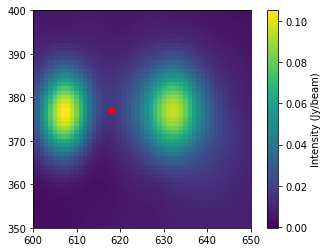

In [15]:
#select pixel (AR,dec) to calculate distance from 
origin = [618,377]  # (AR,dec)
zoom = [600,650,350,400]
wwf.show_image(data,zoom=zoom,circle=[origin[0],origin[1],0])

In [16]:
#escojo el tamaño y hago la nueva imagen
#origin = [2038,2030]
#width = 500
#semi_w = int(width/2)
#zoom =[origin[0]-semi_w, origin[0]+semi_w, origin[1]-semi_w, origin[1]+semi_w]
#subset = wwf.data_subset(data,zoom)
#new_origin = [259,242]
#wwf.show_image(subset,circle=[new_origin[0],new_origin[1],0],zoom=[200,300,200,300])

In [21]:
exp=1.5
new_data = make_new_fits_euclidean(data,origin,exp)

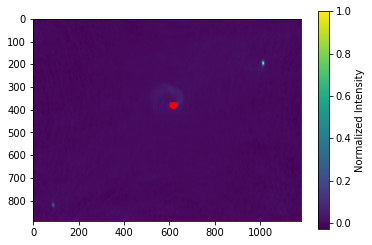

In [18]:
final_data = np.multiply(data, new_data)
final_data_norm = np.divide(final_data,np.amax(final_data))
wwf.show_image(final_data_norm,circle=[origin[0],origin[1],0],color_bar_label='Normalized Intensity')

In [19]:
hdr['BTYPE']='Normalized Intensity'
hdr['BUNIT']=''

In [20]:
outname = 'final_normal_r'+str(exp)+'_'+fits_image[:-5]
wwf.write_fits(final_data_norm, hdr, outname)